# Import library

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Import the dataset

Fetch from sklearn library

In [2]:
faces = fetch_olivetti_faces()
# print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Print the total dataset size

In [3]:
n_samples, h, w = faces.images.shape
n_features = faces.data.shape[1]
n_classes = len(set(faces.target))

print(f"Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

Total dataset size:
n_samples: 400
n_features: 4096
n_classes: 40


# Preprocessing

Visualize some images from the dataset

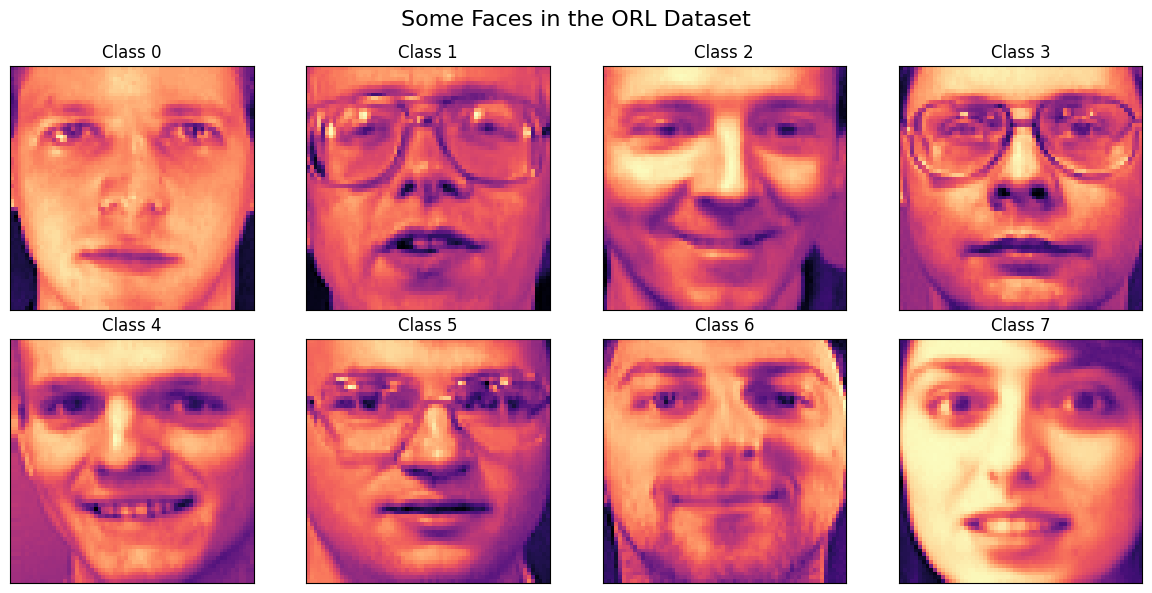

In [4]:
# Create a figure with 2 rows and 4 columns for subplots
figure, splits = plt.subplots(2, 4, figsize=(12, 6))
figure.suptitle("Some Faces in the ORL Dataset", fontsize=16)

# To keep track of the individuals displayed
displayed_classes = []

# Plot the images
for ax in splits.flat:
    # Find an image from a new class that hasn't been displayed yet
    for i in range(len(faces.target)):
        if faces.target[i] not in displayed_classes:
            ax.imshow(faces.images[i], cmap='magma')  # Display grayscale images
            ax.set(xticks=[], yticks=[], title=f'Class {faces.target[i]}')
            displayed_classes.append(faces.target[i])
            break

plt.tight_layout()
plt.show()

Split into a training set and a test set (80% for training and 20% for testing)

In [5]:
X = faces.data # data
y = faces.target # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model

Reduce the dimension with PCA

In [6]:
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
model = DecisionTreeClassifier(random_state=42)

Fit the model

In [8]:
model.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

# Prediction

In [9]:
y_pred = model.predict(X_test_pca)

# Evaluation

Calculate precision, recall, accuracy and f1-score

In [10]:
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.44
Precision: 0.51
Recall: 0.44
F1 Score: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generate and print classification report

In [11]:
class_report = classification_report(y_test, y_pred, digits=2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.40      0.50      0.44         4
           4       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         0
           7       0.33      0.33      0.33         6
           8       0.33      0.50      0.40         2
           9       0.33      0.50      0.40         2
          10       0.33      0.50      0.40         2
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.33      0.33      0.33         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Quantitative evaluation of the model quality on the test set

Highlight classification errors with images




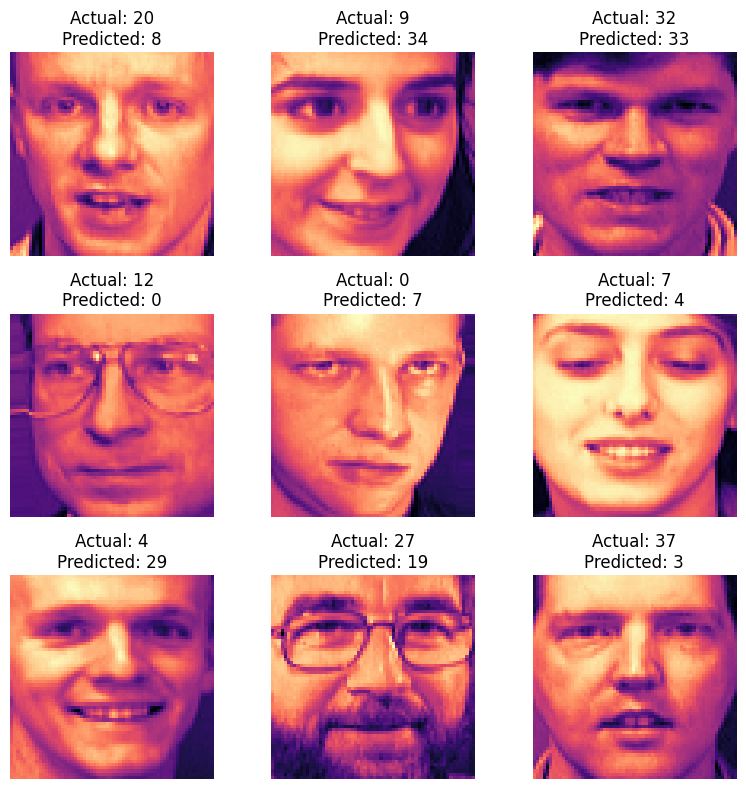


35 are classified as correct and 45 are classified as incorrect!


In [12]:
incorrect = 0
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:  # Check if prediction is incorrect
        prediction_name = y_pred[i]  # Get the predicted label
        actual_name = y_test[i]  # Get the actual label
        incorrect += 1
        if incorrect <= 9:  # Display up to 9 misclassified images
            ax = axes[incorrect - 1]
            ax.imshow(X_test[i].reshape(faces.images.shape[1:]), cmap='magma')  # Reshape to original image shape
            ax.set_title(f"Actual: { actual_name }\nPredicted: { prediction_name }")
            ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{len(y_pred)-incorrect} are classified as correct and {incorrect} are classified as incorrect!")